In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/postings_processed.csv')
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,language,words,id
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,a leading real estate firm in new jersey is se...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,en,358,0
1,1829192,NaN,Mental Health Therapist/Counselor,at aspen therapy and wellness we are committed...,50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0,en,492,1
2,10998357,The National Exemplar,Assitant Restaurant Manager,the national exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,en,66,2
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,senior associate attorney elder law trusts and...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,en,209,3
4,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,the economic development planning intern will ...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,0,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0,en,578,5


In [ ]:
df.isnull().sum()

,0
job_id,0
company_name,1485
title,0
description,0
max_salary,78515
pay_period,72826
location,0
company_id,1483
views,1336
med_salary,100694


In [ ]:
industry_df = pd.read_csv('/content/drive/MyDrive/company_industries.csv')
industry_df.head()

,company_id,industry
0,391906,Book and Periodical Publishing
1,22292832,Construction
2,20300,Banking
3,3570660,Book and Periodical Publishing
4,878353,Staffing and Recruiting


In [ ]:
mapping = dict(zip(industry_df['company_id'],industry_df['industry']))
df['industry'] = df['company_id'].map(mapping)
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,work_type,currency,compensation_type,normalized_salary,zip_code,fips,language,words,id,industry
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,a leading real estate firm in new jersey is se...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,en,358,0,Real Estate
1,1829192,NaN,Mental Health Therapist/Counselor,at aspen therapy and wellness we are committed...,50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0,en,492,1,NaN
2,10998357,The National Exemplar,Assitant Restaurant Manager,the national exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,en,66,2,Restaurants
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,senior associate attorney elder law trusts and...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,en,209,3,Law Practice
4,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,the economic development planning intern will ...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0,en,578,5,Non-profit Organizations


In [ ]:
use_df = df[['job_id','title','description','views','company_id','applies','industry']]
use_df.dropna(subset=['industry'],inplace=True)
use_df.isnull().sum()

,0
job_id,0
title,0
description,0
views,1279
company_id,0
applies,83534
industry,0


In [ ]:
use_df.shape

(104763, 7)

In [ ]:
user_to_job_domain_map = {
    'AGRICULTURE': ['Farming', 'Dairy Product Manufacturing', 'Food and Beverage Manufacturing'],
    'ARTS': ['Performing Arts', 'Artists and Writers', 'Media Production', 'Animation and Post-production'],
    'SALES': ['Retail', 'Retail Groceries', 'Retail Apparel and Fashion', 'Wholesale', 'Consumer Services'],
    'CONSULTANT': ['Business Consulting and Services', 'Strategic Management Services', 'Outsourcing and Offshoring Consulting'],
    'DIGITAL-MEDIA': ['Online Audio and Video Media', 'Broadcast Media Production and Distribution', 'Media Production'],
    'CHEF': ['Restaurants', 'Food and Beverage Services', 'Hospitality'],
    'HEALTHCARE': ['Hospitals and Health Care', 'Medical Practices', 'Mental Health Care', 'Pharmaceutical Manufacturing'],
    'PUBLIC-RELATIONS': ['Public Relations and Communications Services', 'Advertising Services', 'Events Services'],
    'AVIATION': ['Airlines and Aviation', 'Aviation and Aerospace Component Manufacturing'],
    'BANKING': ['Banking', 'Financial Services', 'Investment Banking', 'Investment Management'],
    'ACCOUNTANT': ['Accounting', 'Financial Services', 'Insurance'],
    'INFORMATION-TECHNOLOGY': ['Software Development', 'IT Services and IT Consulting', 'Technology, Information and Internet'],
    'HR': ['Human Resources Services', 'Staffing and Recruiting'],
    'CONSTRUCTION': ['Construction', 'Architecture and Planning', 'Civil Engineering'],
    'DESIGNER': ['Graphic Design', 'Design Services', 'Architecture and Planning'],
    'FINANCE': ['Financial Services', 'Investment Management', 'Investment Banking', 'Venture Capital and Private Equity Principals'],
    'FITNESS': ['Wellness and Fitness Services', 'Health and Wellness'],
    'BUSINESS-DEVELOPMENT': ['Business Consulting and Services', 'Strategic Management Services', 'Market Research'],
    'APPAREL': ['Retail Apparel and Fashion', 'Textile Manufacturing', 'Wholesale'],
    'ADVOCATE': ['Law Practice', 'Legal Services', 'Administration of Justice'],
    'BPO': ['Outsourcing and Offshoring Consulting', 'Customer Support', 'IT Services and IT Consulting'],
    'TEACHER': ['Primary and Secondary Education', 'E-Learning Providers', 'Higher Education'],
    'ENGINEERING': ['Civil Engineering', 'Software Development', 'Industrial Machinery Manufacturing', 'Semiconductor Manufacturing'],
    'AUTOMOBILE': ['Motor Vehicle Manufacturing', 'Transportation, Logistics, Supply Chain and Storage']
}

In [ ]:
# save the user --> domain mapping
import json
with open('user_to_job_domain_map.json', 'w') as fp:
    json.dump(user_to_job_domain_map, fp)

In [ ]:
user_to_negative_domains = {
 'AGRICULTURE': ['E-Learning Providers', 'Computer Games'],
 'ARTS': ['Banking', 'Law Enforcement'],
 'SALES': ['Pharmaceutical Manufacturing', 'Legal Services'],
 'CONSULTANT': ['Farming', 'Musicians'],
 'DIGITAL-MEDIA': ['Semiconductor Manufacturing', 'Oil and Gas'],
 'CHEF': ['Computer and Network Security', 'Strategic Management Services'],
 'HEALTHCARE': ['Real Estate', 'Retail Luxury Goods and Jewelry'],
 'PUBLIC-RELATIONS': ['Dairy Product Manufacturing', 'Computer Hardware Manufacturing'],
 'AVIATION': ['Libraries', 'Primary and Secondary Education'],
 'BANKING': ['Performing Arts', 'Food and Beverage Services'],
 'ACCOUNTANT': ['Photography', 'Entertainment Providers'],
 'INFORMATION-TECHNOLOGY': ['Tobacco Manufacturing', 'Religious Institutions'],
 'HR': ['Glass, Ceramics and Concrete Manufacturing', 'Transportation, Logistics, Supply Chain and Storage'],
 'CONSTRUCTION': ['Translation and Localization', 'Book and Periodical Publishing'],
 'DESIGNER': ['Banking', 'Pharmaceutical Manufacturing'],
 'FINANCE': ['Animation and Post-production', 'Museums, Historical Sites, and Zoos'],
 'FITNESS': ['Insurance', 'Mining'],
 'BUSINESS-DEVELOPMENT': ['Veterinary Services', 'Law Enforcement'],
 'APPAREL': ['Nanotechnology Research', 'Administration of Justice'],
 'ADVOCATE': ['Restaurant', 'Semiconductor Manufacturing'],
 'BPO': ['Aviation and Aerospace Component Manufacturing', 'Think Tanks'],
 'TEACHER': ['Real Estate', 'Venture Capital and Private Equity Principals'],
 'ENGINEERING': ['Musicians', 'Artists and Writers'],
 'AUTOMOBILE': ['Fundraising', 'Graphic Design']
}

In [ ]:
# save the negative domain mapping
import json
with open('user_to_negative_domains.json', 'w') as fp:
    json.dump(user_to_negative_domains, fp)

In [ ]:
# load the respective mappings
import json

user_to_job_domain_map = None
user_to_negative_domains = None

with open('user_to_job_domain_map.json', 'r') as fp:
    user_to_job_domain_map = json.load(fp)

with open('user_to_negative_domains.json', 'r') as fp:
    user_to_negative_domains = json.load(fp)

In [ ]:
user_to_job_domain_map

{'AGRICULTURE': ['Farming',
  'Dairy Product Manufacturing',
  'Food and Beverage Manufacturing'],
 'ARTS': ['Performing Arts',
  'Artists and Writers',
  'Media Production',
  'Animation and Post-production'],
 'SALES': ['Retail',
  'Retail Groceries',
  'Retail Apparel and Fashion',
  'Wholesale',
  'Consumer Services'],
 'CONSULTANT': ['Business Consulting and Services',
  'Strategic Management Services',
  'Outsourcing and Offshoring Consulting'],
 'DIGITAL-MEDIA': ['Online Audio and Video Media',
  'Broadcast Media Production and Distribution',
  'Media Production'],
 'CHEF': ['Restaurants', 'Food and Beverage Services', 'Hospitality'],
 'HEALTHCARE': ['Hospitals and Health Care',
  'Medical Practices',
  'Mental Health Care',
  'Pharmaceutical Manufacturing'],
 'PUBLIC-RELATIONS': ['Public Relations and Communications Services',
  'Advertising Services',
  'Events Services'],
 'AVIATION': ['Airlines and Aviation',
  'Aviation and Aerospace Component Manufacturing'],
 'BANKING': [

In [ ]:
user_to_negative_domains

{'AGRICULTURE': ['E-Learning Providers', 'Computer Games'],
 'ARTS': ['Banking', 'Law Enforcement'],
 'SALES': ['Pharmaceutical Manufacturing', 'Legal Services'],
 'CONSULTANT': ['Farming', 'Musicians'],
 'DIGITAL-MEDIA': ['Semiconductor Manufacturing', 'Oil and Gas'],
 'CHEF': ['Computer and Network Security', 'Strategic Management Services'],
 'HEALTHCARE': ['Real Estate', 'Retail Luxury Goods and Jewelry'],
 'PUBLIC-RELATIONS': ['Dairy Product Manufacturing',
  'Computer Hardware Manufacturing'],
 'AVIATION': ['Libraries', 'Primary and Secondary Education'],
 'BANKING': ['Performing Arts', 'Food and Beverage Services'],
 'ACCOUNTANT': ['Photography', 'Entertainment Providers'],
 'INFORMATION-TECHNOLOGY': ['Tobacco Manufacturing', 'Religious Institutions'],
 'HR': ['Glass, Ceramics and Concrete Manufacturing',
  'Transportation, Logistics, Supply Chain and Storage'],
 'CONSTRUCTION': ['Translation and Localization',
  'Book and Periodical Publishing'],
 'DESIGNER': ['Banking', 'Pharm

In [ ]:
# now create a reverse mapping to get parent domain
def reverse_mapping(domain_dict):
  reverse_dict = {}
  for domain,categories in domain_dict.items():
    for category in categories:
      reverse_dict[category] = domain
  return reverse_dict

reverse_user_to_job_domain_map = reverse_mapping(user_to_job_domain_map)
reverse_user_to_negative_domains = reverse_mapping(user_to_negative_domains)

In [ ]:
reverse_user_to_job_domain_map

{'Farming': 'AGRICULTURE',
 'Dairy Product Manufacturing': 'AGRICULTURE',
 'Food and Beverage Manufacturing': 'AGRICULTURE',
 'Performing Arts': 'ARTS',
 'Artists and Writers': 'ARTS',
 'Media Production': 'DIGITAL-MEDIA',
 'Animation and Post-production': 'ARTS',
 'Retail': 'SALES',
 'Retail Groceries': 'SALES',
 'Retail Apparel and Fashion': 'APPAREL',
 'Wholesale': 'APPAREL',
 'Consumer Services': 'SALES',
 'Business Consulting and Services': 'BUSINESS-DEVELOPMENT',
 'Strategic Management Services': 'BUSINESS-DEVELOPMENT',
 'Outsourcing and Offshoring Consulting': 'BPO',
 'Online Audio and Video Media': 'DIGITAL-MEDIA',
 'Broadcast Media Production and Distribution': 'DIGITAL-MEDIA',
 'Restaurants': 'CHEF',
 'Food and Beverage Services': 'CHEF',
 'Hospitality': 'CHEF',
 'Hospitals and Health Care': 'HEALTHCARE',
 'Medical Practices': 'HEALTHCARE',
 'Mental Health Care': 'HEALTHCARE',
 'Pharmaceutical Manufacturing': 'HEALTHCARE',
 'Public Relations and Communications Services': 'PUB

In [ ]:
# make a column called parent domain in use_df
use_df['parent_domain'] = use_df['industry'].map(reverse_user_to_job_domain_map)
use_df.head()

,job_id,title,description,views,company_id,applies,industry,parent_domain
0,921716,Marketing Coordinator,a leading real estate firm in new jersey is se...,20.0,2774458.0,2.0,Real Estate,NaN
2,10998357,Assitant Restaurant Manager,the national exemplar is accepting application...,8.0,64896719.0,NaN,Restaurants,CHEF
3,23221523,Senior Elder Law / Trusts and Estates Associat...,senior associate attorney elder law trusts and...,16.0,766262.0,NaN,Law Practice,ADVOCATE
4,91700727,Economic Development and Planning Intern,the economic development planning intern will ...,9.0,1481176.0,4.0,Non-profit Organizations,NaN
5,103254301,Producer,company description raw cereal is a creative d...,7.0,81942316.0,1.0,Design Services,DESIGNER


In [ ]:
# null values in parent domain
use_df['parent_domain'].isnull().sum()

np.int64(23523)

In [ ]:
null_df = use_df[use_df['parent_domain'].isnull()]
not_null_df = use_df[~use_df['parent_domain'].isnull()]
not_null_df.shape, null_df.shape

((81240, 8), (23523, 8))

In [ ]:
import json

# Define the mapping of child domains to parent domains
child_to_parent_mapping = {
    # HEALTHCARE related
    'Medical Equipment Manufacturing': 'HEALTHCARE',
    'Veterinary Services': 'HEALTHCARE',
    'Biotechnology Research': 'HEALTHCARE',
    'Alternative Medicine': 'HEALTHCARE',

    # INFORMATION-TECHNOLOGY related
    'Computers and Electronics Manufacturing': 'INFORMATION-TECHNOLOGY',
    'Computer and Network Security': 'INFORMATION-TECHNOLOGY',
    'Telecommunications': 'INFORMATION-TECHNOLOGY',
    'Computer Hardware Manufacturing': 'INFORMATION-TECHNOLOGY',
    'Computer Games': 'INFORMATION-TECHNOLOGY',
    'Mobile Gaming Apps': 'INFORMATION-TECHNOLOGY',
    'Wireless Services': 'INFORMATION-TECHNOLOGY',
    'Computer Networking Products': 'INFORMATION-TECHNOLOGY',
    'Information Services': 'INFORMATION-TECHNOLOGY',

    # ENGINEERING related
    'Defense and Space Manufacturing': 'ENGINEERING',
    'Appliances, Electrical, and Electronics Manufacturing': 'ENGINEERING',
    'Machinery Manufacturing': 'ENGINEERING',
    'Automation Machinery Manufacturing': 'ENGINEERING',
    'Renewable Energy Semiconductor Manufacturing': 'ENGINEERING',
    'Railroad Equipment Manufacturing': 'ENGINEERING',
    'Nanotechnology Research': 'ENGINEERING',
    'Glass, Ceramics and Concrete Manufacturing': 'ENGINEERING',
    'Chemical Manufacturing': 'ENGINEERING',
    'Manufacturing': 'ENGINEERING',
    'Paper and Forest Product Manufacturing': 'ENGINEERING',
    'Plastics Manufacturing': 'ENGINEERING',
    'Furniture and Home Furnishings Manufacturing': 'ENGINEERING',
    'Packaging and Containers Manufacturing': 'ENGINEERING',
    'Oil and Gas': 'ENGINEERING',
    'Mining': 'ENGINEERING',
    'Utilities': 'ENGINEERING',
    'Environmental Services': 'ENGINEERING',

    # FINANCE related
    'Real Estate': 'FINANCE',
    'Leasing Non-residential Real Estate': 'FINANCE',

    # SALES related
    'Retail Luxury Goods and Jewelry': 'SALES',
    'Retail Office Equipment': 'SALES',
    'Wholesale Building Materials': 'SALES',
    'Wholesale Import and Export': 'SALES',
    'International Trade and Development': 'SALES',

    # ARTS related
    'Entertainment Providers': 'ARTS',
    'Musicians': 'ARTS',
    'Museums, Historical Sites, and Zoos': 'ARTS',
    'Photography': 'ARTS',
    'Spectator Sports': 'ARTS',

    # TEACHER related
    'Education Administration Programs': 'TEACHER',
    'Libraries': 'TEACHER',
    'Professional Training and Coaching': 'TEACHER',

    # ADVOCATE related
    'Law Enforcement': 'ADVOCATE',
    'Alternative Dispute Resolution': 'ADVOCATE',
    'Legislative Offices': 'ADVOCATE',
    'Public Safety': 'ADVOCATE',

    # CONSTRUCTION related
    'Facilities Services': 'CONSTRUCTION',
    'Warehousing and Storage': 'CONSTRUCTION',

    # AGRICULTURE related
    'Fisheries': 'AGRICULTURE',

    # APPAREL related
    'Personal Care Product Manufacturing': 'APPAREL',
    'Sporting Goods Manufacturing': 'APPAREL',

    # CHEF related
    'Beverage Manufacturing': 'CHEF',
    'Tobacco Manufacturing': 'CHEF',

    # AUTOMOBILE related
    'Truck Transportation': 'AUTOMOBILE',
    'Freight and Package Transportation': 'AUTOMOBILE',

    # AVIATION related
    'Shipbuilding': 'AVIATION',
    'Maritime Transportation': 'AVIATION',

    # DIGITAL-MEDIA related
    'Writing and Editing': 'DIGITAL-MEDIA',
    'Newspaper Publishing': 'DIGITAL-MEDIA',
    'Book and Periodical Publishing': 'DIGITAL-MEDIA',
    'Translation and Localization': 'DIGITAL-MEDIA',
    'Printing Services': 'DIGITAL-MEDIA',

    # FITNESS related
    'Recreational Facilities': 'FITNESS',

    # PUBLIC-RELATIONS related
    'Government Relations Services': 'PUBLIC-RELATIONS',
    'Fundraising': 'PUBLIC-RELATIONS',
    'Philanthropic Fundraising Services': 'PUBLIC-RELATIONS',
    'Non-profit Organizations': 'PUBLIC-RELATIONS',
    'Government Administration': 'PUBLIC-RELATIONS',
    'Civic and Social Organizations': 'PUBLIC-RELATIONS',
    'Political Organizations': 'PUBLIC-RELATIONS',
    'Public Policy Offices': 'PUBLIC-RELATIONS',
    'International Affairs': 'PUBLIC-RELATIONS',

    # HR related
    'Individual and Family Services': 'HR',

    # BUSINESS-DEVELOPMENT related
    'Travel Arrangements': 'BUSINESS-DEVELOPMENT',
    'Research Services': 'BUSINESS-DEVELOPMENT',
    'Think Tanks': 'BUSINESS-DEVELOPMENT',
    'Executive Offices': 'BUSINESS-DEVELOPMENT',

    # BPO related
    'Security and Investigations': 'BPO',

    # Special cases - Religious and Armed Forces could be PUBLIC-RELATIONS
    'Religious Institutions': 'PUBLIC-RELATIONS',
    'Armed Forces': 'PUBLIC-RELATIONS',
    'Gambling Facilities and Casinos': 'BUSINESS-DEVELOPMENT'
}

# Save the mapping to a JSON file
with open('child_to_parent_domain_positive_mapping.json', 'w') as f:
    json.dump(child_to_parent_mapping, f, indent=2)

In [ ]:
null_df['parent_domain'] = null_df['industry'].map(child_to_parent_mapping)
null_df['parent_domain'].isnull().sum()

np.int64(0)

<Axes: xlabel='parent_domain'>

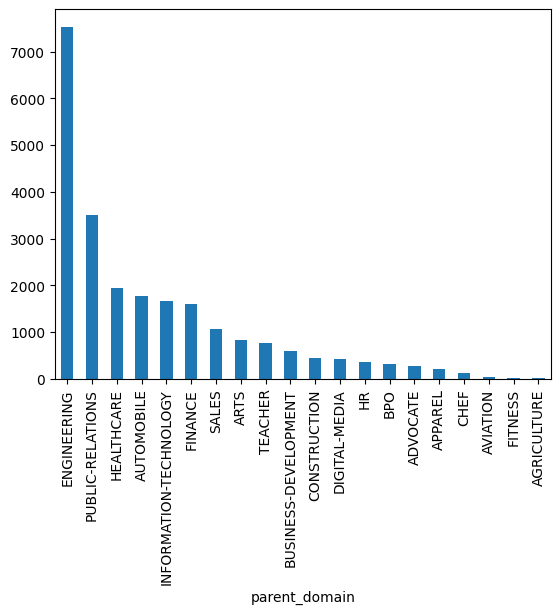

In [ ]:
null_df['parent_domain'].value_counts().plot(kind='bar')

In [ ]:
'''
now after removing the null values from null_df we can combine
not null and null dataframes
'''
full_df = pd.concat([not_null_df,null_df])
full_df.shape

(104763, 8)

In [ ]:
full_df['parent_domain'].unique()

array(['CHEF', 'ADVOCATE', 'DESIGNER', 'HEALTHCARE', 'HR', 'FITNESS',
       'PUBLIC-RELATIONS', 'ENGINEERING', 'TEACHER', 'BANKING', 'FINANCE',
       'BUSINESS-DEVELOPMENT', 'BPO', 'ACCOUNTANT', 'AGRICULTURE',
       'APPAREL', 'CONSTRUCTION', 'SALES', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'AVIATION', 'ARTS', 'INFORMATION-TECHNOLOGY'], dtype=object)

In [ ]:
# Create negative domain mappings using only parent domains
parent_domain_negatives = {
    'CHEF': ['ENGINEERING', 'INFORMATION-TECHNOLOGY', 'AVIATION', 'AUTOMOBILE', 'CONSTRUCTION', 'FINANCE', 'HEALTHCARE'],
    'ADVOCATE': ['CHEF', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE', 'APPAREL', 'AUTOMOBILE', 'ENGINEERING'],
    'DESIGNER': ['HEALTHCARE', 'AGRICULTURE', 'AVIATION', 'BANKING', 'ACCOUNTANT', 'CONSTRUCTION', 'AUTOMOBILE'],
    'HEALTHCARE': ['AUTOMOBILE', 'CONSTRUCTION', 'ARTS', 'CHEF', 'APPAREL', 'AGRICULTURE', 'AVIATION'],
    'HR': ['AVIATION', 'AUTOMOBILE', 'CHEF', 'AGRICULTURE', 'CONSTRUCTION', 'ENGINEERING', 'HEALTHCARE'],
    'FITNESS': ['INFORMATION-TECHNOLOGY', 'BANKING', 'FINANCE', 'CONSTRUCTION', 'AUTOMOBILE', 'AVIATION', 'AGRICULTURE'],
    'PUBLIC-RELATIONS': ['HEALTHCARE', 'CONSTRUCTION', 'AUTOMOBILE', 'CHEF', 'AGRICULTURE', 'ENGINEERING', 'AVIATION'],
    'ENGINEERING': ['CHEF', 'ARTS', 'FITNESS', 'HEALTHCARE', 'APPAREL', 'ADVOCATE', 'AGRICULTURE'],
    'TEACHER': ['AUTOMOBILE', 'CONSTRUCTION', 'CHEF', 'AVIATION', 'APPAREL', 'AGRICULTURE', 'HEALTHCARE'],
    'BANKING': ['HEALTHCARE', 'CHEF', 'ARTS', 'FITNESS', 'AGRICULTURE', 'CONSTRUCTION', 'APPAREL'],
    'FINANCE': ['HEALTHCARE', 'CHEF', 'ARTS', 'FITNESS', 'AGRICULTURE', 'CONSTRUCTION', 'APPAREL'],
    'BUSINESS-DEVELOPMENT': ['HEALTHCARE', 'CHEF', 'CONSTRUCTION', 'AUTOMOBILE', 'AGRICULTURE', 'FITNESS', 'AVIATION'],
    'BPO': ['HEALTHCARE', 'CHEF', 'ARTS', 'FITNESS', 'AGRICULTURE', 'AUTOMOBILE', 'CONSTRUCTION'],
    'ACCOUNTANT': ['HEALTHCARE', 'CHEF', 'ARTS', 'FITNESS', 'AGRICULTURE', 'CONSTRUCTION', 'AUTOMOBILE'],
    'AGRICULTURE': ['INFORMATION-TECHNOLOGY', 'BANKING', 'FINANCE', 'AVIATION', 'AUTOMOBILE', 'HEALTHCARE', 'CONSTRUCTION'],
    'APPAREL': ['AVIATION', 'AUTOMOBILE', 'CONSTRUCTION', 'HEALTHCARE', 'AGRICULTURE', 'ENGINEERING', 'INFORMATION-TECHNOLOGY'],
    'CONSTRUCTION': ['HEALTHCARE', 'CHEF', 'ARTS', 'FITNESS', 'APPAREL', 'ADVOCATE', 'AGRICULTURE'],
    'SALES': ['HEALTHCARE', 'CONSTRUCTION', 'AVIATION', 'AGRICULTURE', 'ENGINEERING', 'FITNESS', 'AUTOMOBILE'],
    'DIGITAL-MEDIA': ['HEALTHCARE', 'CONSTRUCTION', 'AUTOMOBILE', 'AGRICULTURE', 'AVIATION', 'FITNESS', 'ENGINEERING'],
    'AUTOMOBILE': ['HEALTHCARE', 'CHEF', 'ARTS', 'FITNESS', 'ADVOCATE', 'APPAREL', 'AGRICULTURE'],
    'AVIATION': ['HEALTHCARE', 'CHEF', 'ARTS', 'FITNESS', 'AGRICULTURE', 'APPAREL', 'ADVOCATE'],
    'ARTS': ['ENGINEERING', 'CONSTRUCTION', 'AUTOMOBILE', 'AVIATION', 'AGRICULTURE', 'HEALTHCARE', 'INFORMATION-TECHNOLOGY'],
    'INFORMATION-TECHNOLOGY': ['CHEF', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE', 'APPAREL', 'ADVOCATE', 'AUTOMOBILE']
}

In [ ]:
full_df['negative_domain'] = full_df['parent_domain'].map(parent_domain_negatives)
full_df.head()

,job_id,title,description,views,company_id,applies,industry,parent_domain,negative_domain
2,10998357,Assitant Restaurant Manager,the national exemplar is accepting application...,8.0,64896719.0,NaN,Restaurants,CHEF,"[ENGINEERING, INFORMATION-TECHNOLOGY, AVIATION..."
3,23221523,Senior Elder Law / Trusts and Estates Associat...,senior associate attorney elder law trusts and...,16.0,766262.0,NaN,Law Practice,ADVOCATE,"[CHEF, HEALTHCARE, FITNESS, AGRICULTURE, APPAR..."
5,103254301,Producer,company description raw cereal is a creative d...,7.0,81942316.0,1.0,Design Services,DESIGNER,"[HEALTHCARE, AGRICULTURE, AVIATION, BANKING, A..."
7,1218575,Respiratory Therapist,at childrens the regions only fullservice pedi...,3.0,721189.0,NaN,Hospitals and Health Care,HEALTHCARE,"[AUTOMOBILE, CONSTRUCTION, ARTS, CHEF, APPAREL..."
9,9615617,Inside Customer Service Associate,glastender inc is a familyowned manufacturer o...,4.0,1194336.0,1.0,Food and Beverage Services,CHEF,"[ENGINEERING, INFORMATION-TECHNOLOGY, AVIATION..."


In [ ]:
# save the dataset in drive
full_df.to_parquet('/content/drive/MyDrive/processed_data.parquet',index=False)

# **Creating a Dataset**
* Here we will be creating interaction data, interaction data is the record of how users interact with items.
* In our case positive interactions means the user has viewed and applied for a particular domain of job, for eg: a user views jobs of different domains but has applied to only agriculture domain so those jobs come under positive interactions(label 1)
the remaining jobs of domain other than agriculture comes under negative interactions

In [ ]:
jobs_df = pd.read_parquet('/content/drive/MyDrive/processed_data.parquet')
jobs_df.head()

,job_id,title,description,views,company_id,applies,industry,parent_domain,negative_domain
0,10998357,Assitant Restaurant Manager,the national exemplar is accepting application...,8.0,64896719.0,NaN,Restaurants,CHEF,"[ENGINEERING, INFORMATION-TECHNOLOGY, AVIATION..."
1,23221523,Senior Elder Law / Trusts and Estates Associat...,senior associate attorney elder law trusts and...,16.0,766262.0,NaN,Law Practice,ADVOCATE,"[CHEF, HEALTHCARE, FITNESS, AGRICULTURE, APPAR..."
2,103254301,Producer,company description raw cereal is a creative d...,7.0,81942316.0,1.0,Design Services,DESIGNER,"[HEALTHCARE, AGRICULTURE, AVIATION, BANKING, A..."
3,1218575,Respiratory Therapist,at childrens the regions only fullservice pedi...,3.0,721189.0,NaN,Hospitals and Health Care,HEALTHCARE,"[AUTOMOBILE, CONSTRUCTION, ARTS, CHEF, APPAREL..."
4,9615617,Inside Customer Service Associate,glastender inc is a familyowned manufacturer o...,4.0,1194336.0,1.0,Food and Beverage Services,CHEF,"[ENGINEERING, INFORMATION-TECHNOLOGY, AVIATION..."


In [ ]:
temp_df = jobs_df[['job_id','company_id','title','description','industry']]
temp_df.head()

,job_id,company_id,title,description,industry
0,10998357,64896719.0,Assitant Restaurant Manager,the national exemplar is accepting application...,Restaurants
1,23221523,766262.0,Senior Elder Law / Trusts and Estates Associat...,senior associate attorney elder law trusts and...,Law Practice
2,103254301,81942316.0,Producer,company description raw cereal is a creative d...,Design Services
3,1218575,721189.0,Respiratory Therapist,at childrens the regions only fullservice pedi...,Hospitals and Health Care
4,9615617,1194336.0,Inside Customer Service Associate,glastender inc is a familyowned manufacturer o...,Food and Beverage Services


In [ ]:
temp_df.isnull().sum()

,0
job_id,0
company_id,0
title,0
description,0
industry,0


In [ ]:
jobs_df.shape

(104763, 9)

In [ ]:
resume_df = pd.read_csv('/content/drive/MyDrive/Resume.csv')
resume_df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
# filter out only applies data
jobs_df = jobs_df[~jobs_df['applies'].isnull()]
print(f'Job data shape: {jobs_df.shape}')
print(f'Resume data shape: {resume_df.shape}')

Job data shape: (21229, 9)
Resume data shape: (2484, 4)


In [ ]:
import json

user_domain_counts = {}
with open('/content/drive/MyDrive/domain_counts.json', 'r') as json_file:
    user_domain_counts = json.load(json_file)

In [ ]:
user_domain_counts

{'SALES': 116,
 'ENGINEERING': 118,
 'BANKING': 115,
 'HR': 110,
 'AVIATION': 117,
 'FITNESS': 117,
 'AGRICULTURE': 63,
 'ADVOCATE': 118,
 'ARTS': 103,
 'BUSINESS-DEVELOPMENT': 120,
 'CONSTRUCTION': 112,
 'PUBLIC-RELATIONS': 111,
 'APPAREL': 97,
 'CONSULTANT': 115,
 'ACCOUNTANT': 115,
 'TEACHER': 102,
 'INFORMATION-TECHNOLOGY': 120,
 'DESIGNER': 107,
 'HEALTHCARE': 115,
 'DIGITAL-MEDIA': 96,
 'AUTOMOBILE': 36,
 'BPO': 22,
 'CHEF': 118,
 'FINANCE': 118}

In [ ]:
domain_mapping = dict(zip(resume_df['ID'], resume_df['Category']))

In [ ]:
import random
job_domain_counts = jobs_df['parent_domain'].value_counts().to_dict()

training_data = []
print('create interactions')
print('-'*50)

# process each domain
for domain in user_domain_counts.keys():
  if domain not in job_domain_counts.keys():
    print(f'\njob not found for the domain {domain}\n')

  # get the users and jobs for that domain
  domain_jobs = jobs_df[jobs_df['parent_domain'] == domain]
  domain_users = [user_id for user_id, user_domain in domain_mapping.items()
                  if user_domain == domain]

  if len(domain_users) == 0 or len(domain_jobs) == 0:
    print(f'skipping the domain {domain}')
    continue

  # create positive interactions with label 1
  positive_interactions = 0
  for user_id in domain_users:
    for _, job_row in domain_jobs.iterrows():
                training_data.append({
                    'user_id': user_id,
                    'job_id': job_row['job_id'] if 'job_id' in job_row else job_row.name,
                    'label': 1,
                    'job_domain': domain
                })
                positive_interactions += 1

  sample_job = domain_jobs.iloc[0]
  negative_domains = None

  if 'negative_domains' in sample_job:
      try:
          neg_val = sample_job['negative_domains']
          if pd.notna(neg_val):
              if isinstance(neg_val, str):
                  negative_domains = eval(neg_val)
              elif isinstance(neg_val, (list, tuple)):
                  negative_domains = list(neg_val)
              else:
                  negative_domains = None
      except:
          negative_domains = None

  if negative_domains is None:
    negative_domains = ['ENGINEERING', 'INFORMATION-TECHNOLOGY', 'BANKING',
      'FINANCE', 'HEALTHCARE', 'CONSTRUCTION', 'AUTOMOBILE']

  # collect all jobs from negative domains
  negative_jobs = []
  for neg_domain in negative_domains:
      if neg_domain in job_domain_counts:
          neg_domain_jobs = jobs_df[jobs_df['parent_domain'] == neg_domain]
          negative_jobs.extend(neg_domain_jobs.to_dict('records'))

  if len(negative_jobs) == 0:
    print(f'skipping the domain {domain}')
    continue

  # create negative interactions(2 per postive interaction) with label 0
  negative_interactions_req = 2*positive_interactions
  negative_interactions_created = 0

  for user_id in domain_users:
    # calculate number of negative interactions this user needs
    user_positive_interactions = len(domain_jobs)
    user_negative_interactions_req = user_positive_interactions*2

    # sample negative jobs for this user randomly
    sampled_negative_jobs = random.sample(negative_jobs,
              min(user_negative_interactions_req,len(negative_jobs)))

    for neg_job in sampled_negative_jobs:
      training_data.append({
                    'user_id': user_id,
                    'job_id': neg_job['job_id'] if 'job_id' in neg_job else neg_job.get('index', 'unknown'),
                    'label': 0,
                    'job_domain': neg_job['parent_domain']
                })
      negative_interactions_created += 1

# convert to dataframe
training_data = pd.DataFrame(training_data)

# summary
print('\n---------Summary of Training data----------')
print('training data created')
print(f'total interactions created: {len(training_data)}')
print(f'positive interactions: {len(training_data[training_data["label"] == 1])}')
print(f'negative interactions: {len(training_data[training_data["label"] == 0])}')

create interactions
--------------------------------------------------

job not found for the domain CONSULTANT

skipping the domain CONSULTANT

---------Summary of Training data----------
training data created
total interactions created: 5822892
positive interactions: 2006304
negative interactions: 3816588


In [ ]:
training_data

,user_id,job_id,label,job_domain
0,87118391,2954591060,1,SALES
1,87118391,3779260325,1,SALES
2,87118391,3782812525,1,SALES
3,87118391,3789379757,1,SALES
4,87118391,3870701883,1,SALES
...,...,...,...,...
5822887,24967652,3895540912,0,FINANCE
5822888,24967652,3888947582,0,ENGINEERING
5822889,24967652,3904388188,0,HEALTHCARE
5822890,24967652,3900953908,0,ENGINEERING


In [ ]:
# get some ids and check if jobs are correctly mapped
ids = training_data['job_id'].unique()[:10]
df[df['job_id'].isin(ids)][['title','industry']]

,title,industry
90,Social Media Coordinator,Retail
311,Assistant Buyer / Receiving,Retail
316,Salesperson,Retail
332,Bench Store Manager,Retail
642,Merchandise Planner,Retail
1205,Inventory Analyst,Consumer Services
1291,Visual Merchandiser,Retail
1346,Transportation Dispatcher,Retail
1515,eCommerce Analyst Associate,Retail
1578,Senior Sales Associate - Keyholder,Retail


In [ ]:
training_data.to_parquet('/content/drive/MyDrive/training_data.parquet',index=False)